<a href="https://colab.research.google.com/github/Tasneem1312/22BDS0402-EDA-Project/blob/main/22BDS0402_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name: Shaik Tasneem Kauser
Reg.no: 22BDS0402


1. Setup & Loading Data


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/recid.csv"
df = pd.read_csv(url)

# Display first few rows
df.head()


,rownames,black,alcohol,drugs,super,married,felon,workprg,property,person,priors,educ,rules,age,tserved,follow,durat,cens,ldurat
0,1,0,1,0,1,1,0,1,0,0,0,7,2,441,30,72,72,1,4.276666
1,2,1,0,0,1,0,1,1,1,0,0,12,0,307,19,75,75,1,4.317488
2,3,0,0,0,0,0,0,1,1,0,0,9,5,262,27,81,9,0,2.197225
3,4,0,0,1,1,0,1,1,1,0,2,9,3,253,38,76,25,0,3.218876
4,5,0,0,1,1,0,0,0,0,0,0,9,0,244,4,81,81,1,4.394449


2. Dataset Dimensions

In [ ]:
print('Number of rows:', df.shape[0])
print('Number of columns:', df.shape[1])


Number of rows: 1445
Number of columns: 19


3. Summary Statistics

In [ ]:
df.describe(include='all')


,rownames,black,alcohol,drugs,super,married,felon,workprg,property,person,priors,educ,rules,age,tserved,follow,durat,cens,ldurat
count,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000
mean,723.000000,0.485121,0.209689,0.241522,0.694118,0.255363,0.314187,0.465052,0.254671,0.053287,1.431834,9.702422,1.185467,345.435986,19.182007,74.885813,55.372318,0.617993,3.745150
std,417.279882,0.499952,0.407227,0.428154,0.460940,0.436216,0.464352,0.498950,0.435827,0.224683,2.850443,2.441567,2.295409,121.050536,20.963778,3.500510,27.297830,0.486046,0.925045
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,198.000000,0.000000,70.000000,1.000000,0.000000,0.000000
25%,362.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,0.000000,258.000000,6.000000,72.000000,27.000000,0.000000,3.295837
50%,723.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000,307.000000,12.000000,74.000000,71.000000,1.000000,4.262680
75%,1084.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,2.000000,11.000000,1.000000,395.000000,25.000000,78.000000,76.000000,1.000000,4.330733
max,1445.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,28.000000,19.000000,27.000000,933.000000,219.000000,81.000000,81.000000,1.000000,4.394449


4. Data Handling
  - Checking datatypes and nulls

In [ ]:
df.info()
print('Missing values per column:\n', df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1445 entries, 0 to 1444
Data columns (total 19 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   rownames  1445 non-null   int64  
 1   black     1445 non-null   int64  
 2   alcohol   1445 non-null   int64  
 3   drugs     1445 non-null   int64  
 4   super     1445 non-null   int64  
 5   married   1445 non-null   int64  
 6   felon     1445 non-null   int64  
 7   workprg   1445 non-null   int64  
 8   property  1445 non-null   int64  
 9   person    1445 non-null   int64  
 10  priors    1445 non-null   int64  
 11  educ      1445 non-null   int64  
 12  rules     1445 non-null   int64  
 13  age       1445 non-null   int64  
 14  tserved   1445 non-null   int64  
 15  follow    1445 non-null   int64  
 16  durat     1445 non-null   int64  
 17  cens      1445 non-null   int64  
 18  ldurat    1445 non-null   float64
dtypes: float64(1), int64(18)
memory usage: 214.6 KB
Missing values per co

In [ ]:
# Example: If certain columns should be categorical
categorical_cols = ['black', 'alcohol', 'drugs', 'super', 'married', 'felon', 'workprg', 'property', 'person', 'cens']
for col in categorical_cols:
    df[col] = df[col].astype('category')


5. Data Cleaning
 - Handle missing values

In [ ]:
df_clean = df.dropna()

 - Detect and handle duplicates

In [ ]:
print('Duplicate rows:', df.duplicated().sum())
df_clean = df_clean.drop_duplicates()


Duplicate rows: 0


6. Univariate Analysis

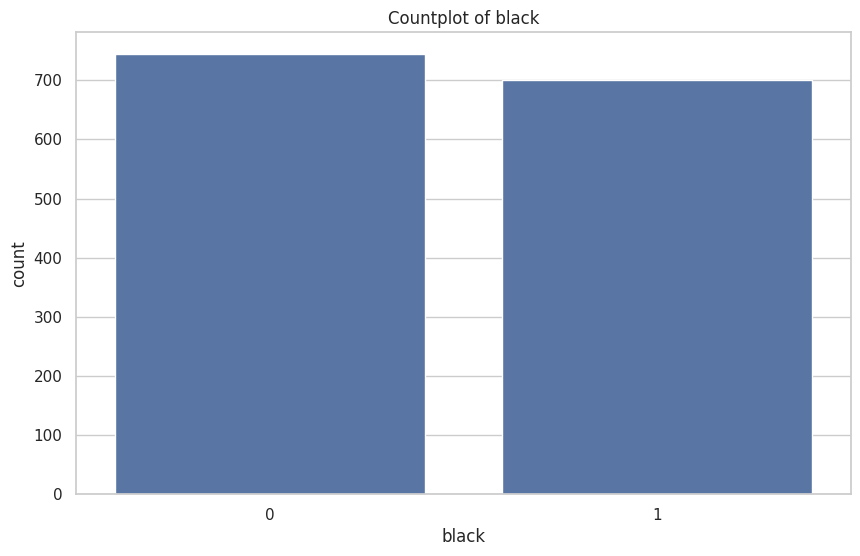

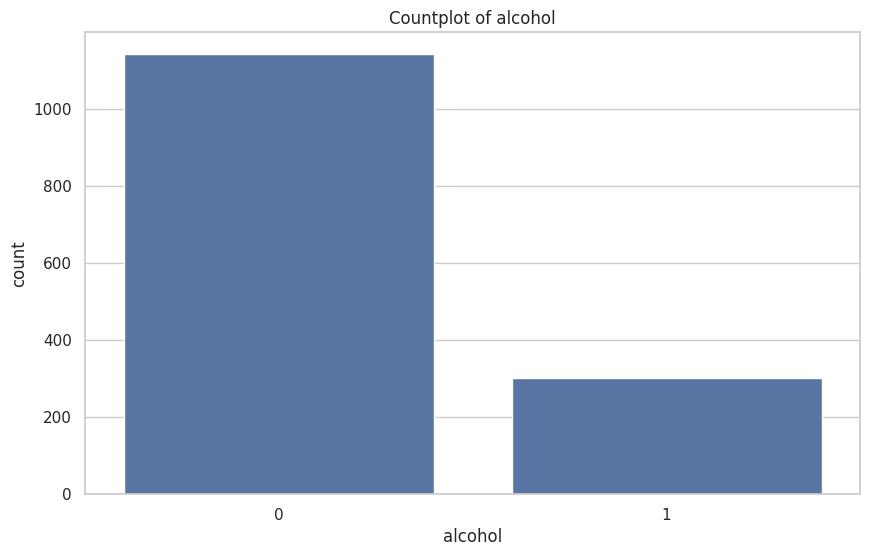

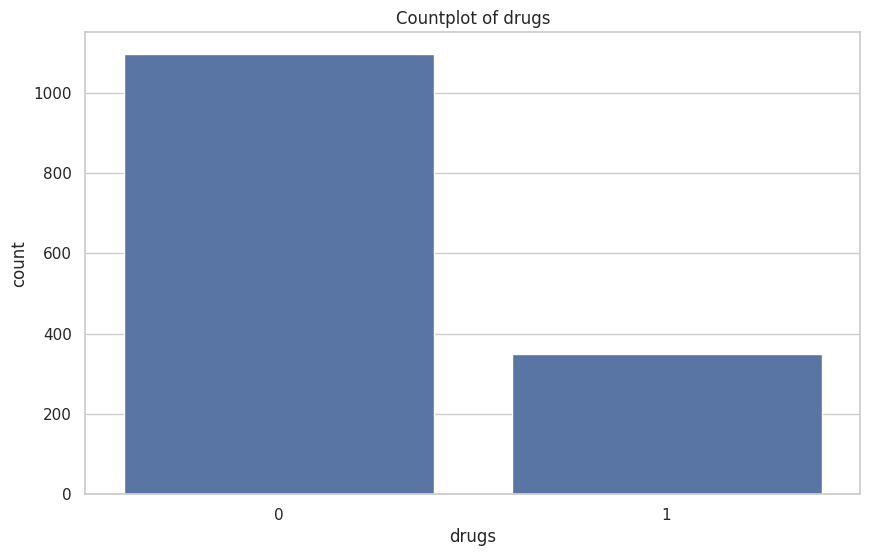

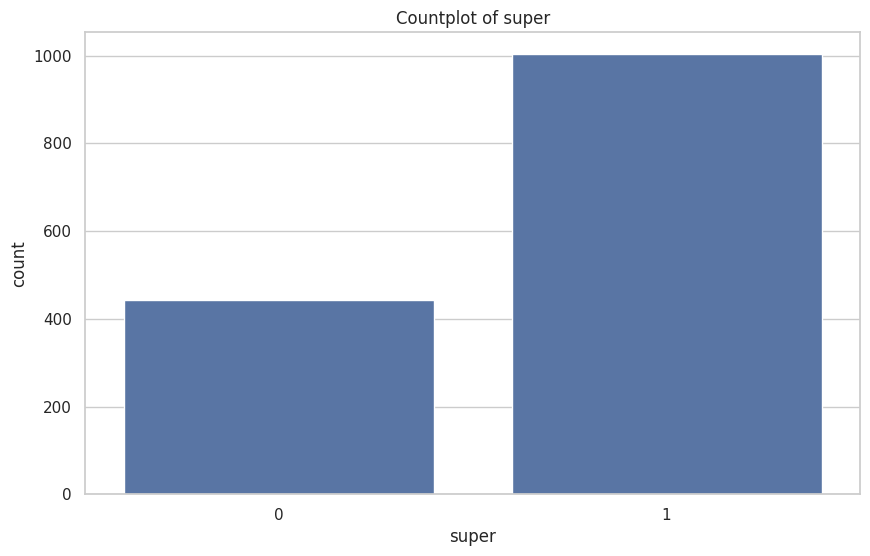

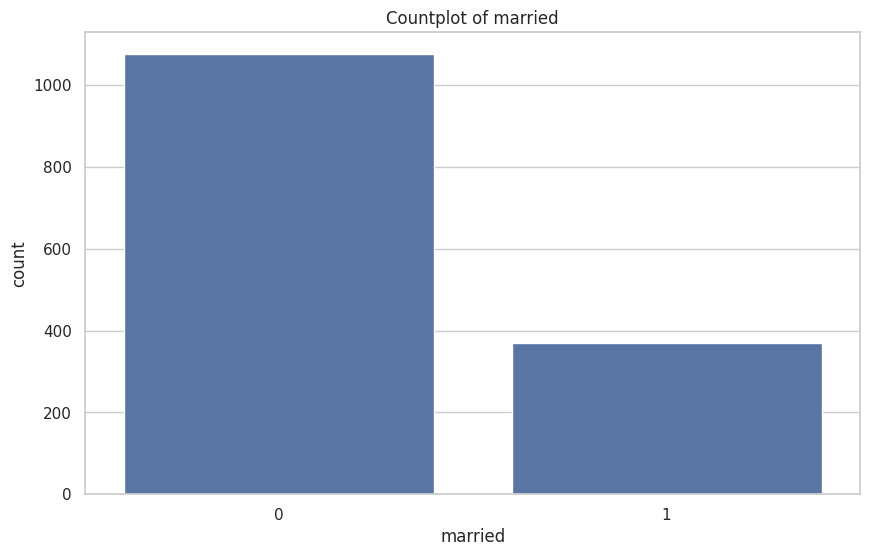

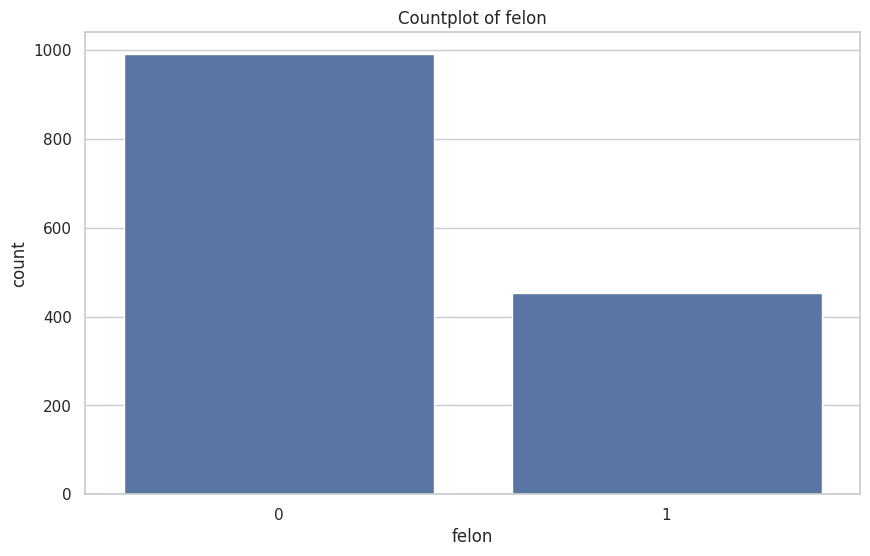

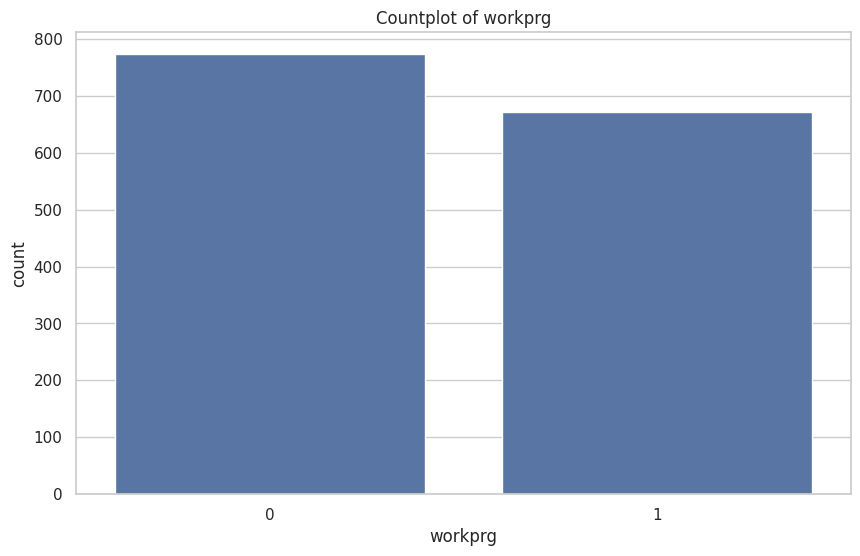

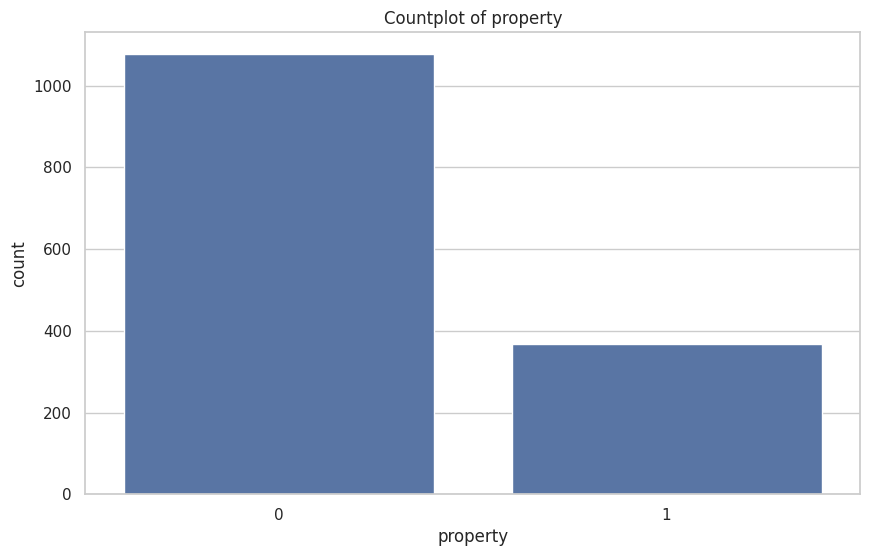

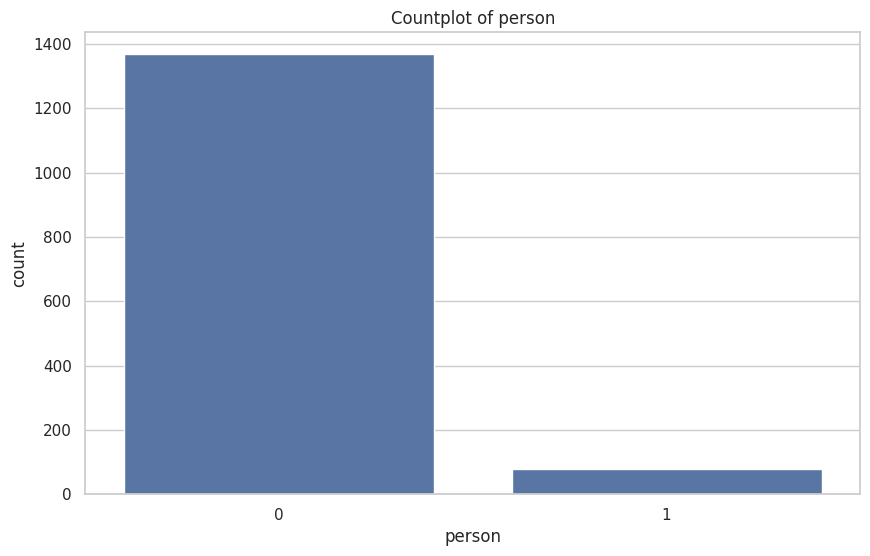

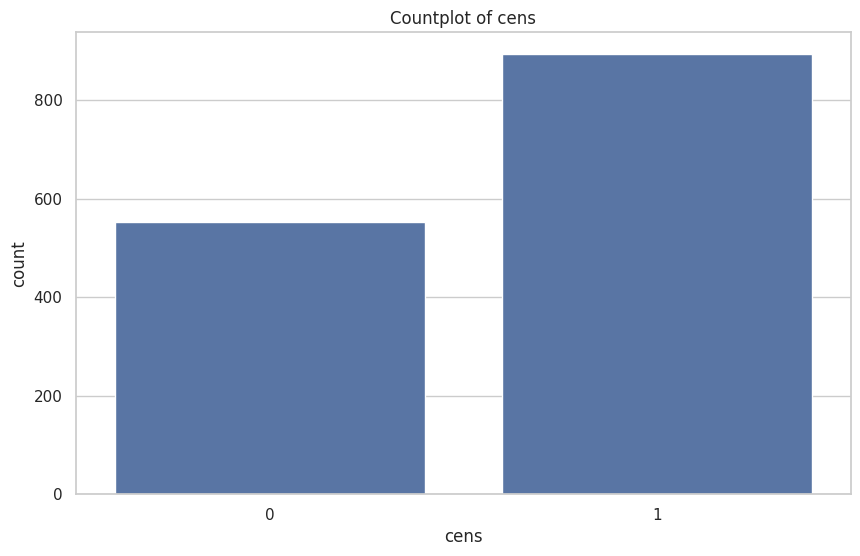

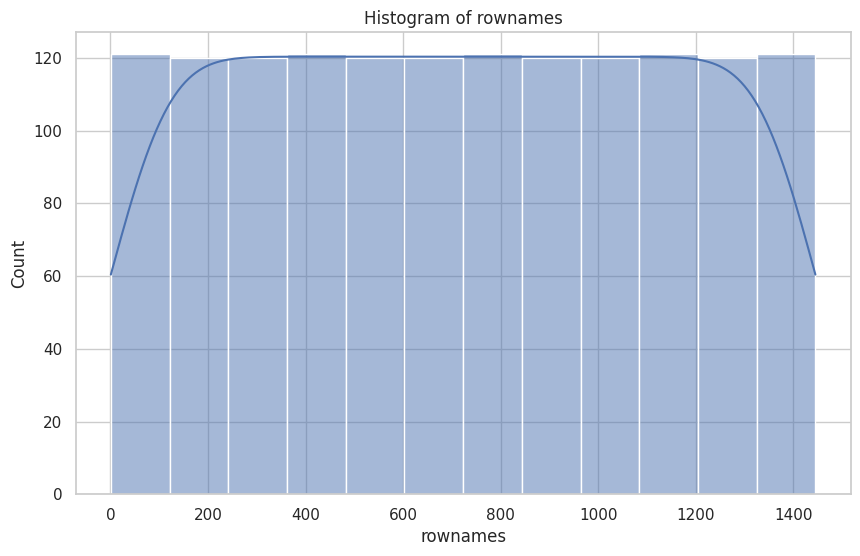

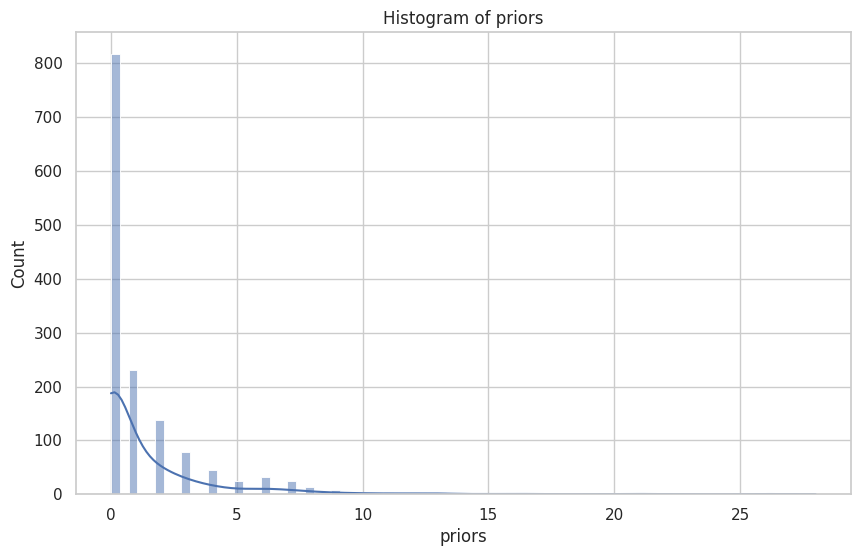

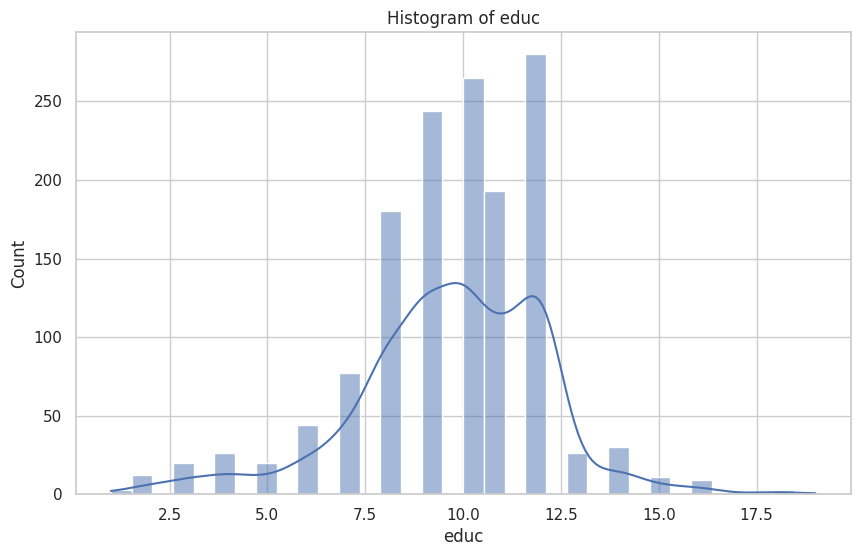

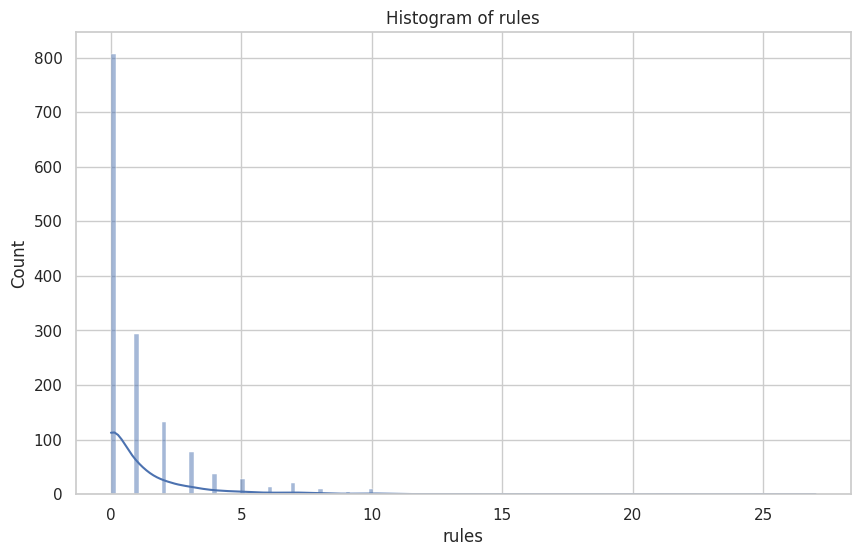

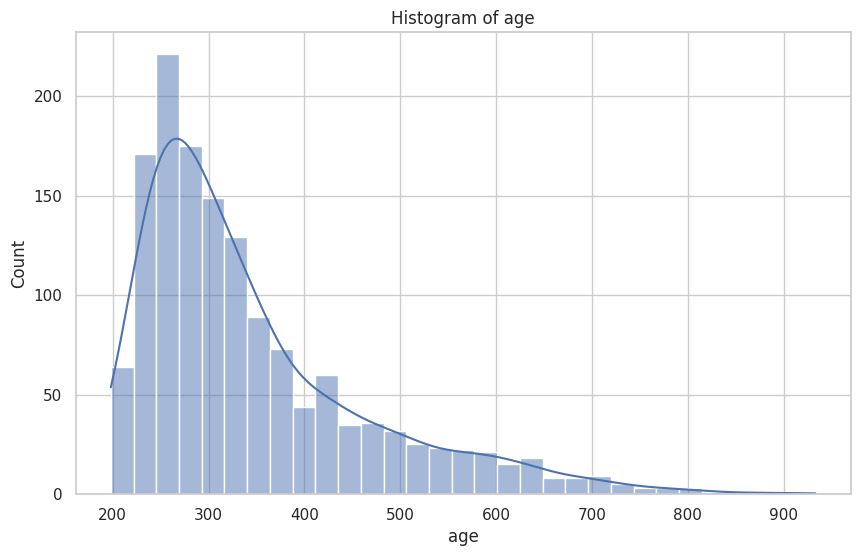

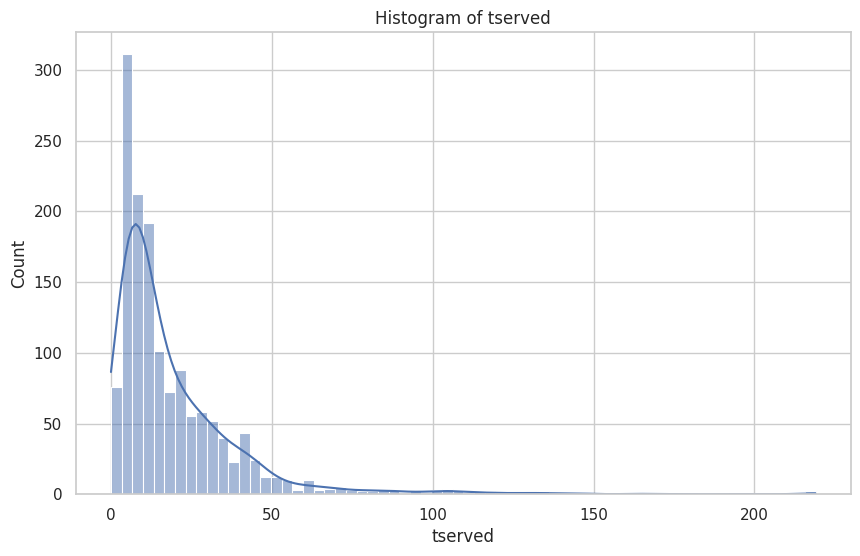

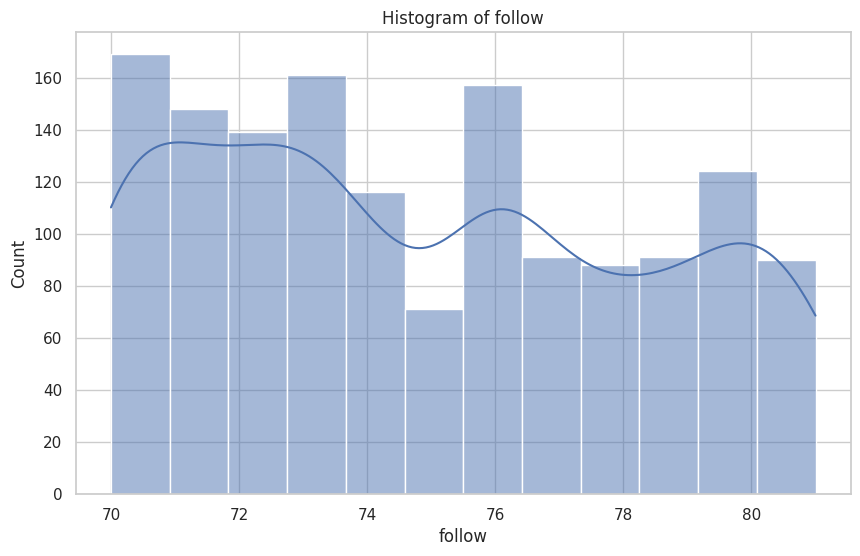

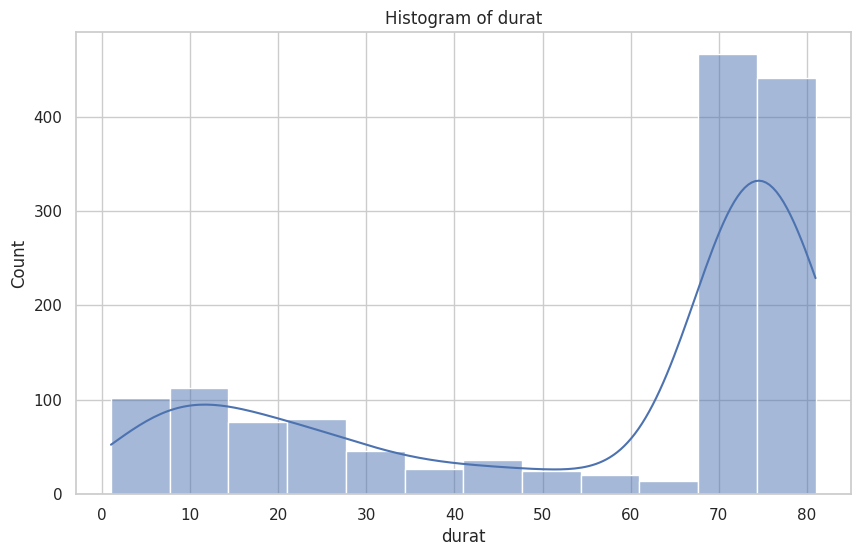

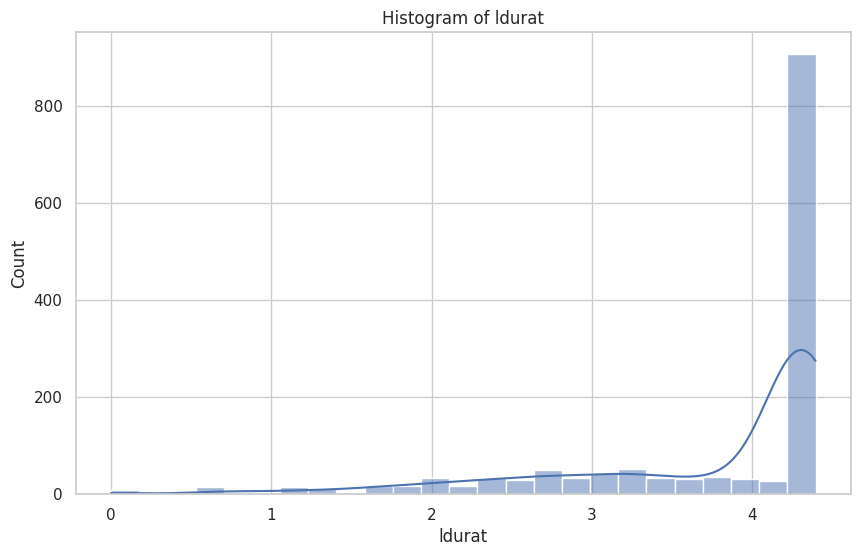

In [ ]:
# For categorical columns
for col in categorical_cols:
    sns.countplot(x=col, data=df_clean)
    plt.title(f'Countplot of {col}')
    plt.show()

# For numerical columns
num_cols = df_clean.select_dtypes(include=np.number).columns
for col in num_cols:
    sns.histplot(df_clean[col], kde=True)
    plt.title(f'Histogram of {col}')
    plt.show()


7. Bivariate Analysis

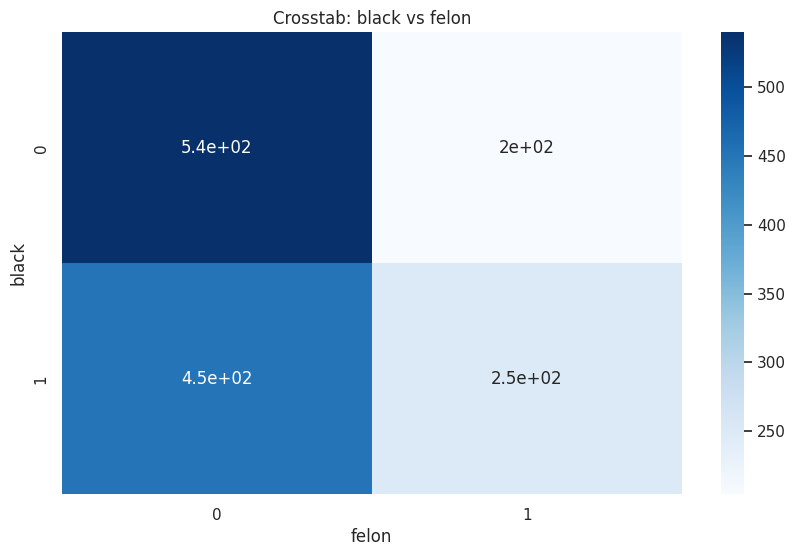

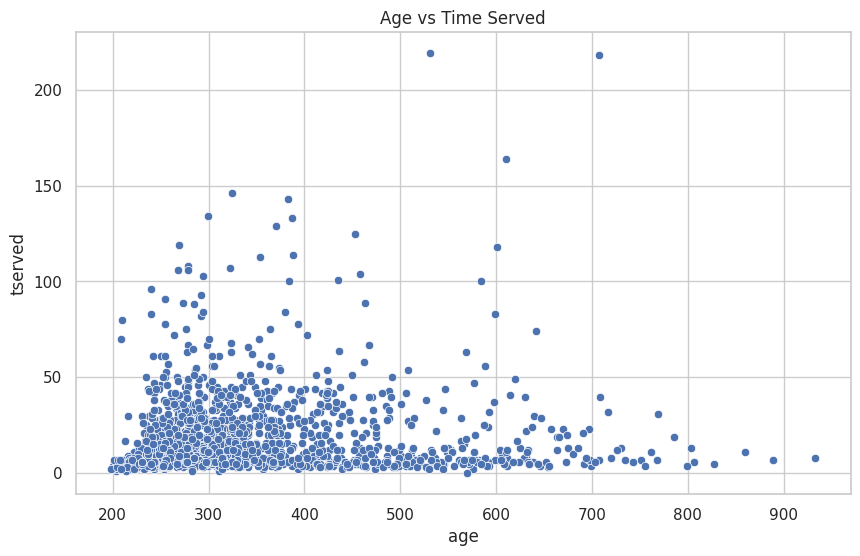

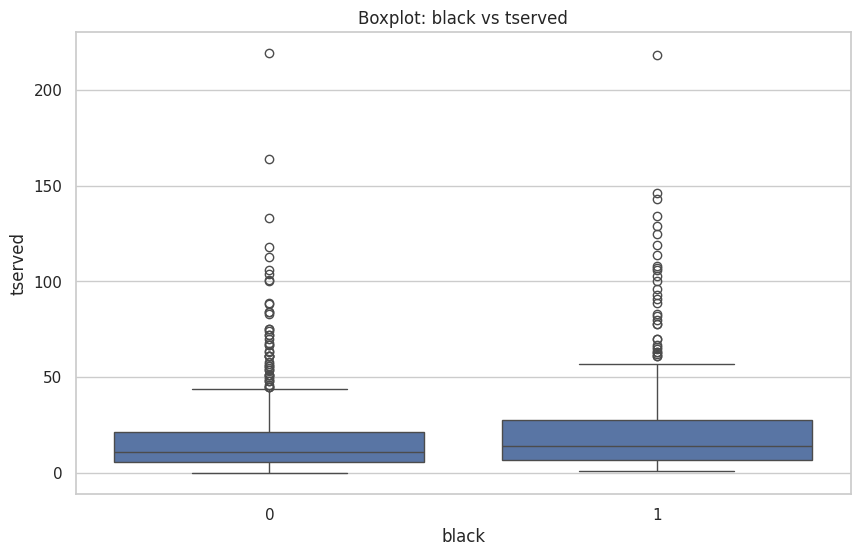

In [ ]:
# Categorical vs Categorical: Crosstab & heatmap
pd.crosstab(df_clean['black'], df_clean['felon'])
sns.heatmap(pd.crosstab(df_clean['black'], df_clean['felon']), annot=True, cmap='Blues')
plt.title('Crosstab: black vs felon')
plt.show()

# Numerical vs Numerical: Scatter plots
sns.scatterplot(data=df_clean, x='age', y='tserved')
plt.title('Age vs Time Served')
plt.show()

# Categorical vs Numerical: Boxplots
sns.boxplot(x='black', y='tserved', data=df_clean)
plt.title('Boxplot: black vs tserved')
plt.show()


8. Multivariate Analysis

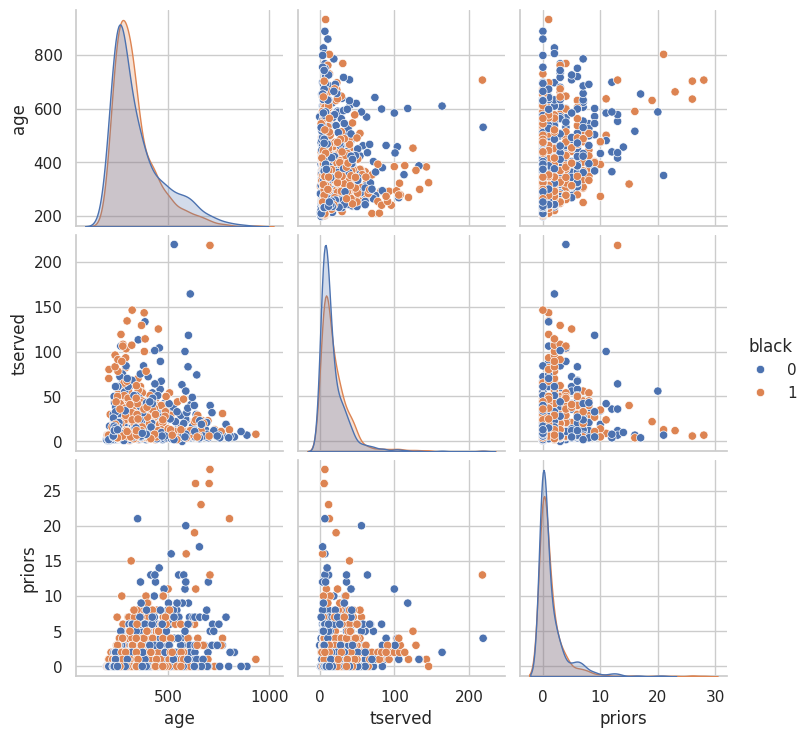

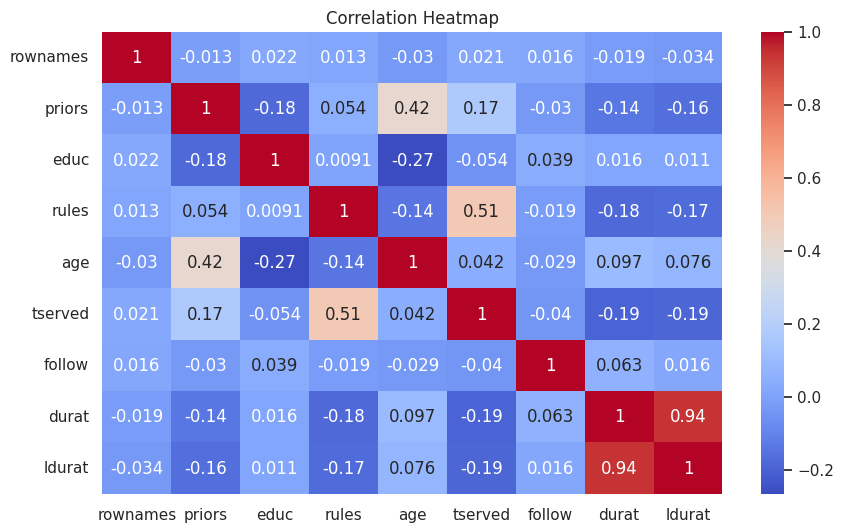

In [ ]:
# Pairplot for a subset of columns
sns.pairplot(df_clean[['age', 'tserved', 'priors', 'black', 'felon']], hue='black')
plt.show()

# Heatmap for correlation
corr = df_clean.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()
